# Cohort 215 AUCs analysis 

### Imports and environment setup

- Date of run: 2024-10-04
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils
import ms_utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

# Data loading and preprosessing

For this analysis, we are going to work with the MS matrix ─located at ["data/ms/MS_verification_215.csv"](<../data/ms/MS_verification_215.csv>)─. For this dataset so far we have no metadata, just values for peptides and pathology condition for the 215 samples.

In [4]:
MS_215_PATH = "../data/ms/MS_215_ratios.csv"

In [5]:
df_215 = pd.read_csv(MS_215_PATH, sep=",", header=[0,1], index_col=0)

In [6]:
# Combine the names of headers at level 0 and 1 and make them the new headers
df_215.columns = ["_".join(filter(lambda x: x != '', col)).strip() for col in df_215.columns.values]


In [7]:
df_215.columns

Index(['Unnamed: 1_level_0_DIAGNOSIS', 'AGR2_LPQTLSR', 'AGR2_LPQTLSR.1',
       'AGR2_LAEQFVLLNLVYETTDK', 'AGR2_LAEQFVLLNLVYETTDK.1',
       'AGRIN_VLGAPVPAFEGR', 'AGRIN_VLGAPVPAFEGR.1', 'AGRIN_LELGIGPGAATR',
       'AGRIN_LELGIGPGAATR.1', 'BCAM_AGAAGTAEATAR',
       ...
       'PRDX1_LVQAFQFTDK', 'PRDX1_LVQAFQFTDK.1', 'CAYP1_EAVIAAAFAK',
       'CAYP1_EAVIAAAFAK.1', 'CAYP1_SGDGVVTVDDLR', 'CAYP1_SGDGVVTVDDLR.1',
       'MIF_LLCGLLAER', 'MIF_LLCGLLAER.1', 'MIF_VYINYYDMNAANVGWNNSTFA',
       'MIF_VYINYYDMNAANVGWNNSTFA.1'],
      dtype='object', length=199)

In [8]:
# Rename the column 0 to "Pathology" and make it categorical
df_215 = df_215.rename(columns={df_215.columns[0]: "Pathology"})
df_215['Pathology'] = df_215['Pathology'].apply(lambda x: 1 if x.startswith("T") else 0)

# Computing the models

In [9]:
# General parames
RESULTS_PATH = '../data/results/215'
BIOMARKERS_215 = df_215.columns[1:]
METHODS = ['direct']

In [10]:
models_215 = utils.compute_all_models_and_save(df=df_215, 
                                              biomarkers=BIOMARKERS_215, 
                                              target_col='Pathology', 
                                              methods=METHODS, 
                                              max_biomarker_count=1,
                                              folder_name=RESULTS_PATH,
                                              auc_threshold=0.0, 
                                              plot_rocs=False,
                                              compute_auc_ci=True)

Could not fit the model for biomarkers: ['LAT1_SADGSAPAGEGEGVTLQR']
zero-size array to reduction operation maximum which has no identity
Could not compute the AUC for biomarkers: ['LAT1_VQDAFAAAK']
Could not fit the model for biomarkers: ['RAB8A_LEGNSPQGSNQGVK']
zero-size array to reduction operation maximum which has no identity
Could not fit the model for biomarkers: ['RL11_ISKEEAMR']
zero-size array to reduction operation maximum which has no identity
Could not compute the AUC for biomarkers: ['SYIC_EFEDAFPADFIAEGIDQTR']


In [11]:
# Load the results
df_215_results_direct_max_1 = pd.read_csv(f'{RESULTS_PATH}/direct/max_1.csv', sep=',', index_col=0, header=0)
df_215_results_direct_max_1.head(10)

,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,
RUVB1_LDPSIFESLQK,0.83721,0.69767,0.81250,0.50000,0.90909,0.71717
MX1_DVPDLTLIDLPGITR,0.83383,0.76389,0.82143,0.57500,0.91667,0.62626
CASP3_SGTDVDAANLR,0.79223,0.67708,0.83784,0.66667,0.84416,0.64646
MX1_VAVGNQPADIGYK,0.78022,0.60000,0.90323,0.48276,0.93750,0.63636
VAMP8_GENLEHLR,0.76923,0.78846,0.57692,0.57692,0.78846,0.65657
LDHA_VTLTSEEEAR,0.76523,0.58407,0.96078,0.67586,0.94286,0.65657
LDHA_LVIITAGAR,0.76202,0.63717,0.85294,0.67969,0.82759,0.62626
AGRIN_LELGIGPGAATR,0.75531,0.60000,0.82716,0.62617,0.81081,0.61616
OSTP_AIPVAQDLNAPSDWDSR,0.74663,0.75000,0.71591,0.70000,0.76415,0.55556


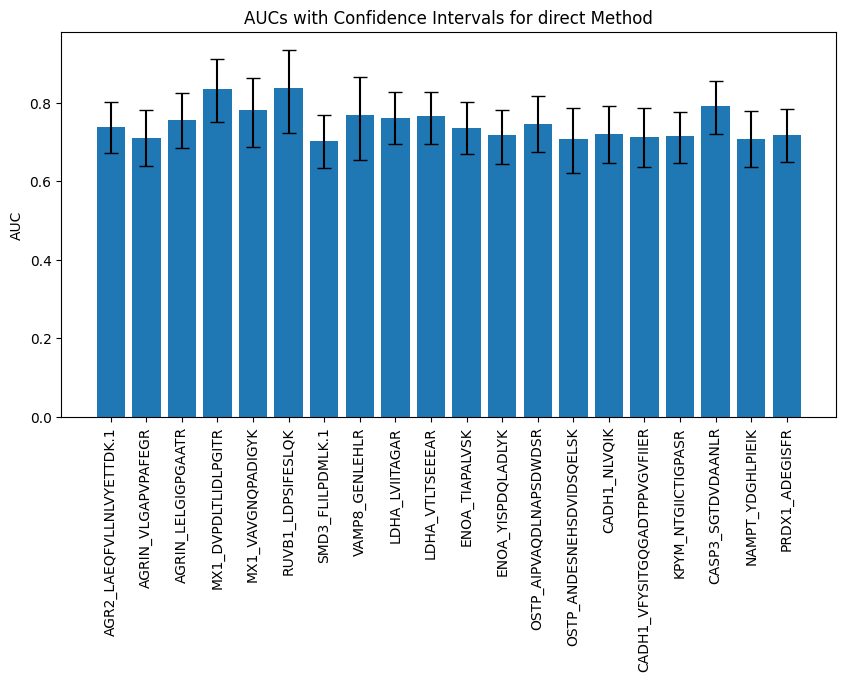

In [12]:
BIOMARKERS_215_cis = df_215_results_direct_max_1.head(20).index
utils.plot_aucs_with_confidence_intervals(models_215, 'direct', BIOMARKERS_215_cis)

In [15]:
BIOMARKERS_205_cis = df_215_results_direct_max_1.head(30).index
BIOMARKERS_high = []
for bmk in BIOMARKERS_215_cis:
    prot = bmk.split('_')[0]
    pep = bmk.split('_')[1]
    if prot not in  [p.split("_")[0] for p in BIOMARKERS_high]:
        BIOMARKERS_high.append(bmk)

In [16]:
_ = utils.compute_all_models_and_save(df=df_215, 
                                        biomarkers=BIOMARKERS_high, 
                                        target_col='Pathology', 
                                        methods=METHODS, 
                                        max_biomarker_count=3,
                                        folder_name=RESULTS_PATH,
                                        auc_threshold=0.5, 
                                        plot_rocs=True)

In [17]:
df_215_results_direct_max_3 = pd.read_csv(f'{RESULTS_PATH}/direct/max_3.csv', sep=',', index_col=0, header=0)
df_215_results_direct_max_3.head(10)

,Biomarker_2,Biomarker_3,AUC,Sensitivity,Specificity,NPV,PPV,Best_Threshold
Biomarker_1,,,,,,,,
RUVB1_LDPSIFESLQK,MX1_DVPDLTLIDLPGITR,OSTP_AIPVAQDLNAPSDWDSR,1.00000,1.00000,1.00000,1.00000,1.00000,0.76768
RUVB1_LDPSIFESLQK,VAMP8_GENLEHLR,OSTP_AIPVAQDLNAPSDWDSR,0.97500,0.87500,1.00000,0.55556,1.00000,0.92929
RUVB1_LDPSIFESLQK,AGRIN_LELGIGPGAATR,OSTP_AIPVAQDLNAPSDWDSR,0.97308,0.95000,0.92308,0.85714,0.97436,0.71717
RUVB1_LDPSIFESLQK,MX1_DVPDLTLIDLPGITR,CASP3_SGTDVDAANLR,0.97297,0.91892,1.00000,0.57143,1.00000,0.83838
RUVB1_LDPSIFESLQK,MX1_DVPDLTLIDLPGITR,LDHA_VTLTSEEEAR,0.95495,0.86486,1.00000,0.54545,1.00000,0.82828
RUVB1_LDPSIFESLQK,OSTP_AIPVAQDLNAPSDWDSR,NaN,0.94472,0.90244,0.93333,0.77778,0.97368,0.74747
RUVB1_LDPSIFESLQK,OSTP_AIPVAQDLNAPSDWDSR,CADH1_NLVQIK,0.94472,0.90244,0.93333,0.77778,0.97368,0.74747
RUVB1_LDPSIFESLQK,OSTP_AIPVAQDLNAPSDWDSR,SMD3_FLILPDMLK.1,0.94309,0.85366,0.93333,0.70000,0.97222,0.76768
RUVB1_LDPSIFESLQK,OSTP_AIPVAQDLNAPSDWDSR,NAMPT_YDGHLPIEIK,0.94146,0.90244,0.93333,0.77778,0.97368,0.75758
